# Gross-Pitaevskii equation with external magnetic field

We solve the 2D Gross-Pitaevskii equation with a magnetic field.
This is similar to the
previous example (Gross-Pitaevskii equation in one dimension),
but with an extra term for the magnetic field.
We reproduce here the results of https://arxiv.org/pdf/1611.02045.pdf Fig. 10

Iter     Function value   Gradient norm 
     0     3.058232e+01     7.074562e+00
 * time: 0.0035219192504882812
     1     2.864603e+01     4.582526e+00
 * time: 0.01611781120300293
     2     1.848148e+01     4.931995e+00
 * time: 0.031334877014160156
     3     1.328807e+01     3.078029e+00
 * time: 0.046608924865722656
     4     1.114127e+01     3.291949e+00
 * time: 0.06014299392700195
     5     1.050450e+01     2.034393e+00
 * time: 0.0737769603729248
     6     9.466159e+00     1.019555e+00
 * time: 0.08729887008666992
     7     8.836408e+00     9.151313e-01
 * time: 0.10047292709350586
     8     8.578815e+00     7.385999e-01
 * time: 0.11350488662719727
     9     8.453234e+00     7.639866e-01
 * time: 0.12631487846374512
    10     8.330653e+00     6.034220e-01
 * time: 0.13908600807189941
    11     8.309718e+00     7.904934e-01
 * time: 0.14892983436584473
    12     8.270047e+00     6.943418e-01
 * time: 0.15926384925842285
    13     8.238070e+00     9.019443e-01
 * ti

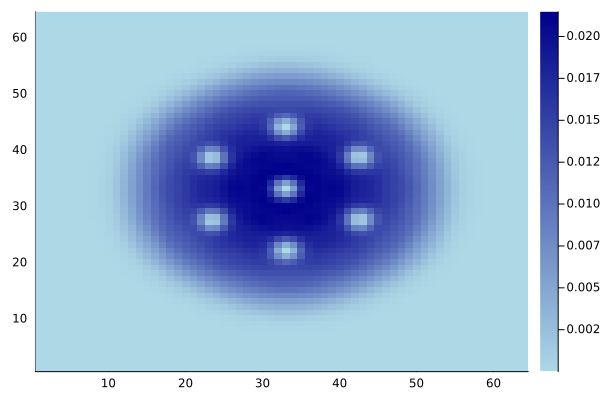

In [1]:
using DFTK
using StaticArrays
using Plots

# Unit cell. Having one of the lattice vectors as zero means a 2D system
a = 15
lattice = a .* [[1 0 0.]; [0 1 0]; [0 0 0]];

# Confining scalar potential, and magnetic vector potential
pot(x, y, z) = ((x - a/2)^2 + (y - a/2)^2)/2
ω = .6
Apot(x, y, z) = ω * @SVector [y - a/2, -(x - a/2), 0]
Apot(X) = Apot(X...);


# Parameters
Ecut = 20  # Increase this for production
η = 500
C = η/2
α = 2
n_electrons = 1;  # Increase this for fun

# Collect all the terms, build and run the model
terms = [Kinetic(),
         ExternalFromReal(X -> pot(X...)),
         LocalNonlinearity(ρ -> C * ρ^α),
         Magnetic(Apot),
]
model = Model(lattice; n_electrons, terms, spin_polarization=:spinless)  # spinless electrons
basis = PlaneWaveBasis(model; Ecut, kgrid=(1, 1, 1))
scfres = direct_minimization(basis, tol=1e-5)  # Reduce tol for production
heatmap(scfres.ρ[:, :, 1, 1], c=:blues)